Automatically created module for IPython interactive environment
Coefficients of regr: 
 [44.64921599]
Mean squared error: 2548.07
Coefficient of determination: 0.47
153.36255924170615
Coefficients of sampling: 
 [153.36255924  44.64921599]
Mean squared error: 2548.07
Coefficient of determination: 0.47


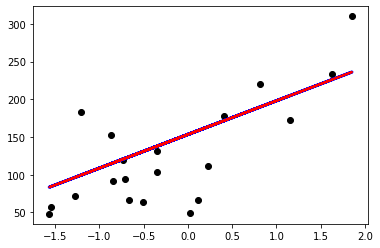

In [8]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from RegressionMethod import RegressionMethod
from SamplingMethod import SamplingMethod

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

diabetes_X_train, diabetes_X_test = SamplingMethod.scale_standard(diabetes_X_train, diabetes_X_test)

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients of regr: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

model = RegressionMethod()
X = []
z = []
sampling = SamplingMethod(X, z, model)
diabetes_X_train = np.c_[ np.ones(diabetes_X_train.shape[0]), diabetes_X_train]
diabetes_X_test = np.c_[ np.ones(diabetes_X_test.shape[0]), diabetes_X_test]
sampling.model.set_data(diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test)
sampling.model.find_beta()
#sampling.model.beta = regr.coef_
#sampling.model.beta_optimal = diabetes_X_test @ regr.coef_
sampling.model.find_optimal_beta()
print(np.mean(diabetes_y_train))

# The coefficients
print('Coefficients of sampling: \n', sampling.model.beta)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, sampling.model.beta_optimal))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, sampling.model.beta_optimal))

# Plot outputs
plt.scatter(diabetes_X_test[:,1:], diabetes_y_test,  color='black')
plt.plot(diabetes_X_test[:,1:], diabetes_y_pred, color='blue', linewidth=3)
plt.plot(diabetes_X_test[:,1:], sampling.model.beta_optimal, color='red', linewidth=2)

In [2]:
b = np.zeros((diabetes_X_train.shape[0],diabetes_X_train.shape[1]+1))
b[:,:-1] = diabetes_X_train
b.shape

(422, 3)

In [12]:
data_mean = np.mean(diabetes_X_train[:,1:], axis = 0)
print(data_mean)

data_std = np.std(diabetes_X_train[:,1:], axis = 0)
diabetes_X_train_scaled = diabetes_X_train
diabetes_X_train_scaled[:,1:] = np.divide((diabetes_X_train[:,1:] - data_mean), data_std)
print(diabetes_X_train[:10])
print("--------------")
print(diabetes_X_train_scaled[:10])

[-1.26281292e-17]
[[ 1.          1.28651799]
 [ 1.         -1.09158939]
 [ 1.          0.92413972]
 [ 1.         -0.25358965]
 [ 1.         -0.77450841]
 [ 1.         -0.86510298]
 [ 1.         -1.00099483]
 [ 1.         -0.04975187]
 [ 1.          1.28651799]
 [ 1.          0.81089651]]
--------------
[[ 1.          1.28651799]
 [ 1.         -1.09158939]
 [ 1.          0.92413972]
 [ 1.         -0.25358965]
 [ 1.         -0.77450841]
 [ 1.         -0.86510298]
 [ 1.         -1.00099483]
 [ 1.         -0.04975187]
 [ 1.          1.28651799]
 [ 1.          0.81089651]]


Coefficients of regr: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47
Coefficients of regr: 
 [44.64921599]
Mean squared error: 2548.07
Coefficient of determination: 0.47


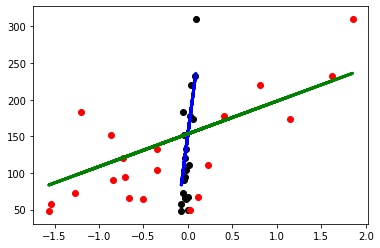

In [29]:
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

num_of_data = 20
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-num_of_data]
diabetes_X_test = diabetes_X[-num_of_data:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-num_of_data]
diabetes_y_test = diabetes_y[-num_of_data:]

# Scale the data
scaler = StandardScaler()
scaler.fit(diabetes_X_train)
diabetes_X_train_scaled = scaler.transform(diabetes_X_train)
diabetes_X_test_scaled = scaler.transform(diabetes_X_test)

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients of regr: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Train on the scaled data:
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(diabetes_X_train_scaled, diabetes_y_train)
diabetes_y_pred_scaled = regr.predict(diabetes_X_test_scaled)

# The coefficients
print('Coefficients of regr: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred_scaled))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred_scaled))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.scatter(diabetes_X_test_scaled, diabetes_y_test,  color='red')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.plot(diabetes_X_test_scaled, diabetes_y_pred_scaled, color='green', linewidth=3)